<a href="https://colab.research.google.com/github/cweyandt/orb/blob/main/02%20EDA/eda_occSensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
# Mount google drive to list the raw data files

# Mounting the drive is straightforward but requires authentication each 
# time we reset the session
drive.mount('/content/drive')
drive_path = '/content/drive/Shareddrives/Capstone_Vacancy/data/'
# ! ls /content/drive/Shareddrives/Capstone_Vacancy/data

occSensors = pd.read_pickle(drive_path + 'cleaned/' + 'lightingOccSensors.pkl')

occSensors.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Floor                                                    1  ...                          4
Room                                                   145  ...                        437
Sensor                                           006C-FCC2  ...                  0080-FFF3
Tag                       145 Open Lab OCS 008 [006C-FCC2]  ... 437 Office OCS [0080-FFF3]
ts                                                          ...                           
2021-05-06 09:05:00+00:00                              1.0  ...                        NaN
2021-05-06 09:10:00+00:00                              1.0  ...                        0.0
2021-05-06 09:15:00+00:00                              1.0  ...                        NaN
2021-05-06 09:20:00+00:00                              NaN  ...                        NaN
2021-05-06 09:25:00+00:00                              NaN  ...                        NaN

[5 rows x 287 columns]

In [9]:
plt.rcParams["figure.figsize"] = (20,10)

In [10]:
occSensors.groupby(by='Floor', axis=1).sum().head()

Floor,1,2,3,4,5
ts,,,,,
2020-07-07 12:20:00+00:00,0.0,16.0,0.0,0.0,0.0
2020-07-07 12:25:00+00:00,0.0,9.0,0.0,0.0,0.0
2020-07-07 12:30:00+00:00,0.0,11.0,0.0,0.0,0.0
2020-07-07 12:35:00+00:00,0.0,6.0,0.0,0.0,0.0
2020-07-07 12:40:00+00:00,0.0,8.0,8.0,30.0,0.0


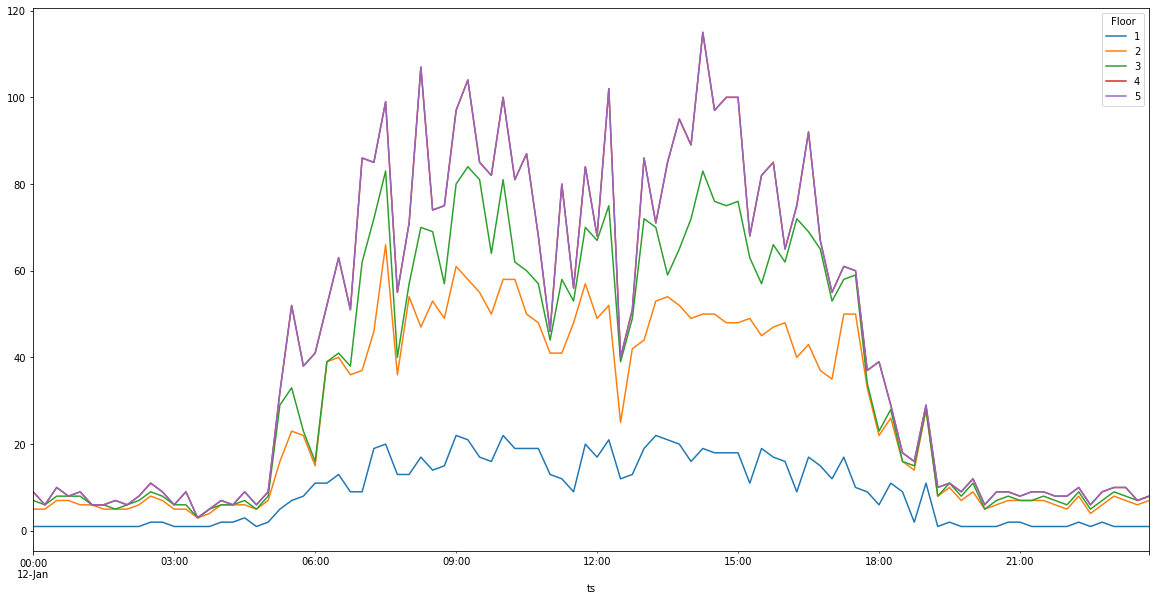

In [11]:
occSensors['2021-01-12'].groupby(by='Floor', axis=1).sum().resample('15min').max().plot(stacked=True)

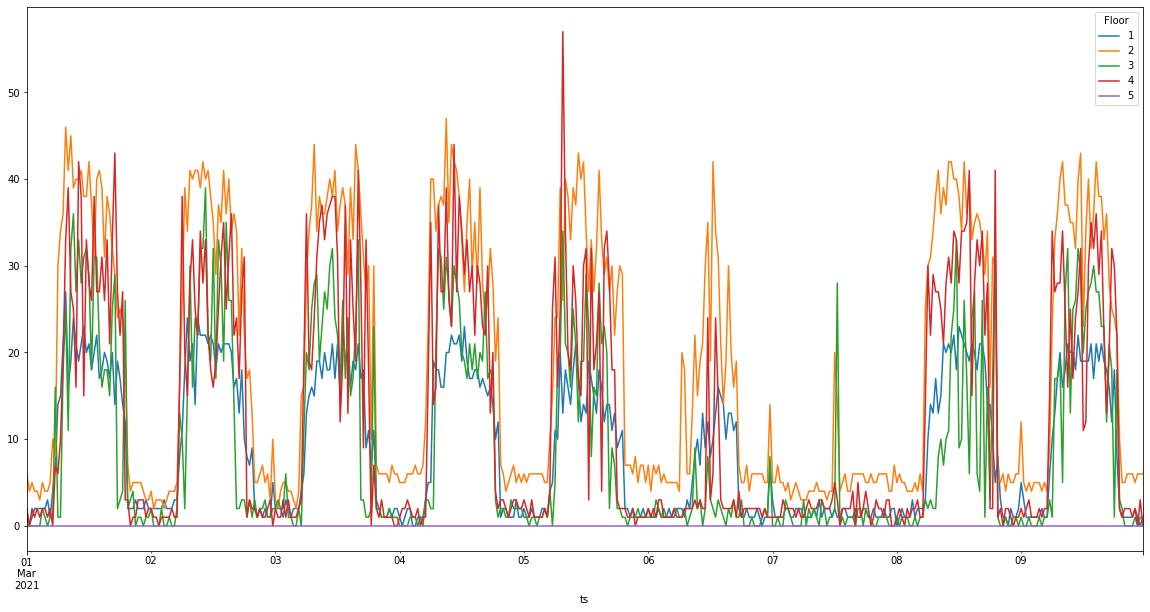

In [12]:
occSensors["2021-03-01":'2021-03-09'].groupby(by="Floor", axis=1).sum().resample('30min').max().plot(stacked=False, legend=True)

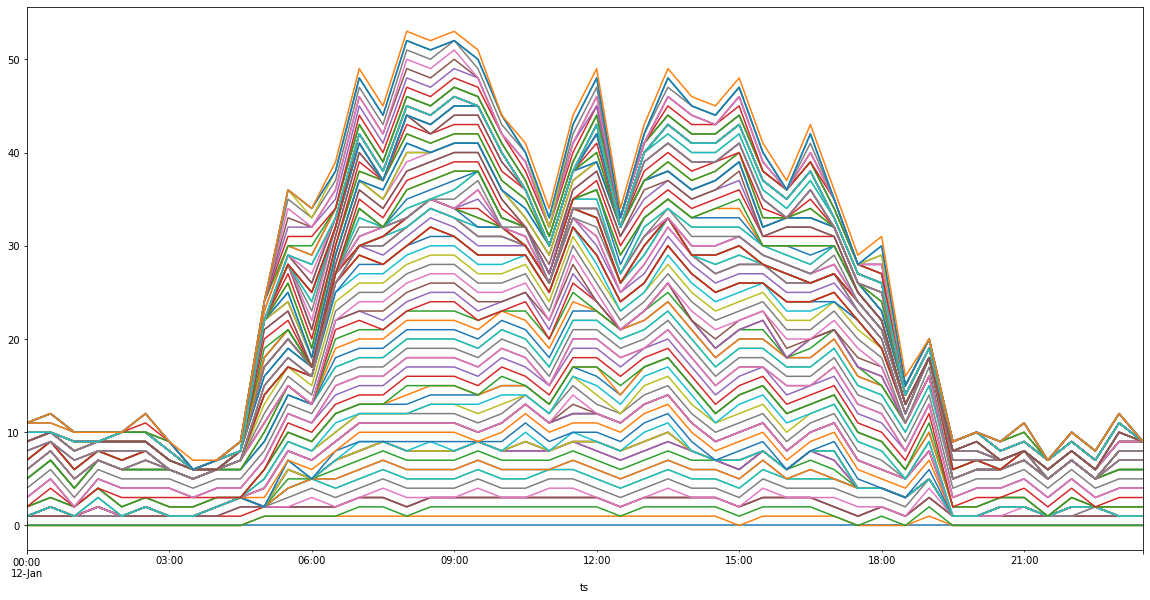

In [13]:
occSensors['2021-01-12'].groupby(by='Room', axis=1).max().resample('30min').max().plot(stacked=True, legend=False)

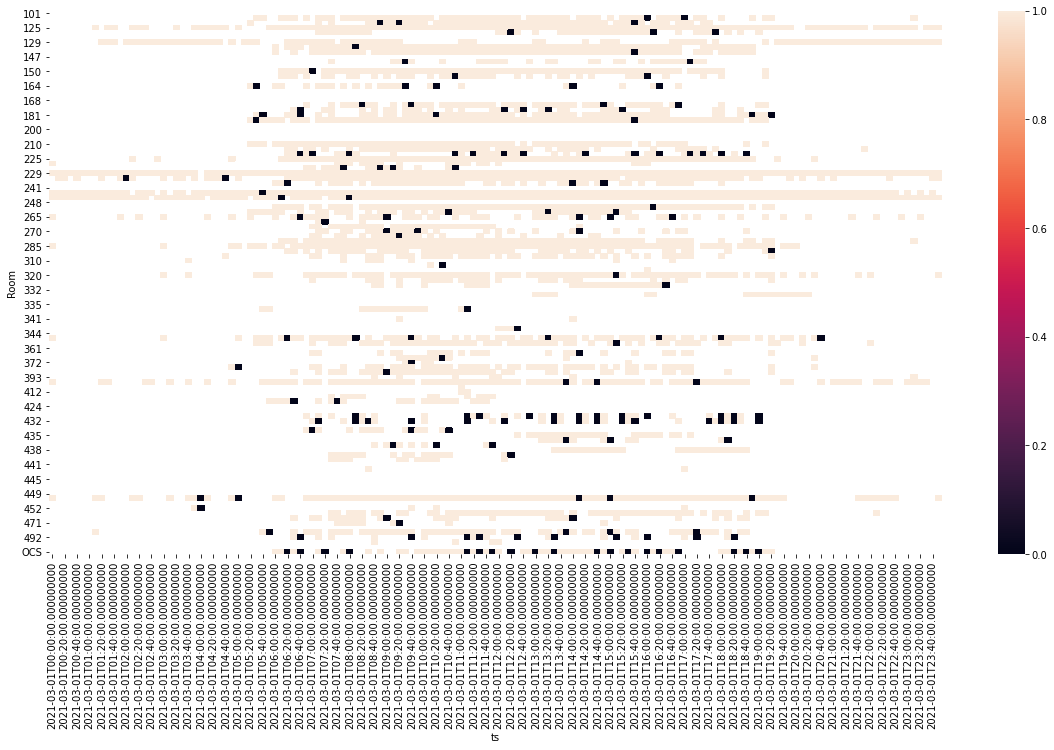

In [14]:
data = occSensors['2021-03-01'].groupby(by='Room', axis=1).max().resample('10min').max()
# data = occSensors['2021-03-01'].replace(np.nan,0).groupby(by='Room', axis=1).max().resample('10min').max()
# plot heatmap
ax = sns.heatmap(data.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
# plt.savefig('seabornPandas.png', dpi=100)
plt.show()

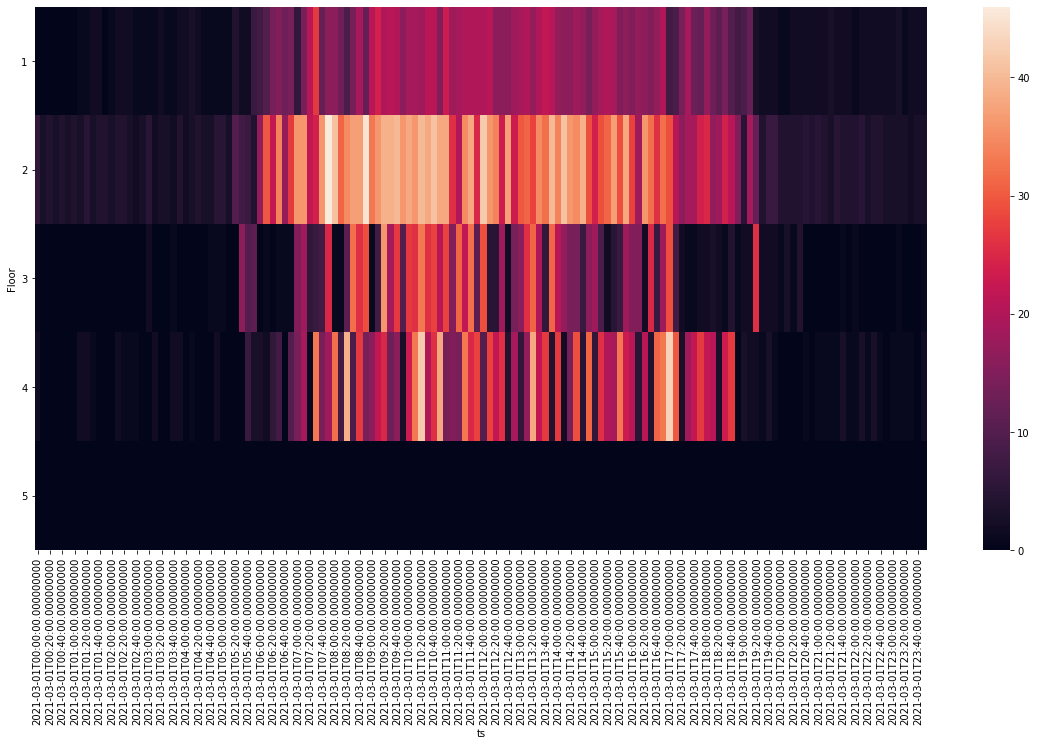

In [15]:
data = occSensors['2021-03-01'].groupby(by='Floor', axis=1).sum().resample('10min').max()
# data = occSensors['2021-03-01'].replace(np.nan,0).groupby(by='Room', axis=1).max().resample('10min').max()
# plot heatmap
ax = sns.heatmap(data.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
# plt.savefig('seabornPandas.png', dpi=100)
plt.show()

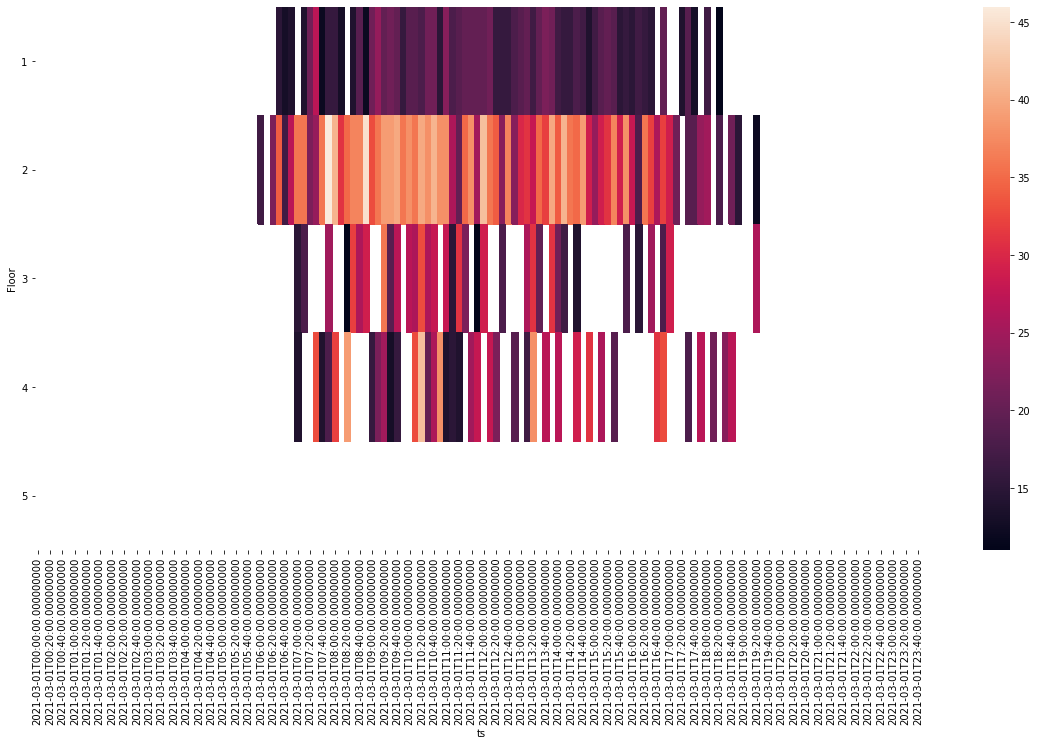

In [17]:
# data = occSensors['2021-03-01'].groupby(by='Floor', axis=1).sum()[data > 10]
data = occSensors['2021-03-01'].groupby(by='Floor', axis=1).sum().resample('10min').max()[data > 10]

ax = sns.heatmap(data.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
# plt.savefig('seabornPandas.png', dpi=100)
plt.show()